<a href="https://colab.research.google.com/github/preenet/961733-EnergyDataAnalytics/blob/master/9717333_Week_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Import dataset

In [43]:
data_path = '/content/drive/My Drive/Colab Notebooks/'
df = pd.read_excel(data_path+'ENB2012_data.xlsx')

In [44]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2. Prepocessing  
Transformation for ordinal vars

In [45]:
from sklearn.preprocessing import MinMaxScaler

x5 = pd.get_dummies(df['X5'], prefix='X5', dtype= float)
df = pd.concat([df, x5], axis =1)

x6 = pd.get_dummies(df['X6'], prefix='X6', dtype= float)
df = pd.concat([df, x6], axis =1)

x8 = pd.get_dummies(df['X8'], prefix='X8', dtype= float)
df = pd.concat([df, x8], axis =1)

# now drop the original columns
df.drop(['X5'],axis=1, inplace=True)
df.drop(['X6'],axis=1, inplace=True)
df.drop(['X8'],axis=1, inplace=True)

In [46]:
df.head()

,X1,X2,X3,X4,X7,Y1,Y2,X5_3.5,X5_7.0,X6_2,X6_3,X6_4,X6_5,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
0,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.90,563.5,318.5,122.50,0.0,20.84,28.28,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# normalized with minmax algorithm
scaler = MinMaxScaler(feature_range=(-1,1))
normalized_df = scaler.fit_transform(df)


# Modeling
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

In [50]:
from sklearn import preprocessing
# we are going to predict the heating load 'y1'

# we are going to predict the heating load 'y1'
Y = df['Y1']
X = df.drop(['Y1', 'Y2'], axis = 1)

# normalize the data attributes


In [53]:

Y = Y.to_numpy()
X = X.to_numpy()

AttributeError: ignored

In [54]:
Y

array([15.55 , 15.55 , 15.55 , 15.55 , 20.84 , 21.46 , 20.71 , 19.68 ,
       19.5  , 19.95 , 19.34 , 18.31 , 17.05 , 17.41 , 16.95 , 15.98 ,
       28.52 , 29.9  , 29.63 , 28.75 , 24.77 , 23.93 , 24.77 , 23.93 ,
        6.07 ,  6.05 ,  6.01 ,  6.04 ,  6.37 ,  6.4  ,  6.366,  6.4  ,
        6.85 ,  6.79 ,  6.77 ,  6.81 ,  7.18 ,  7.1  ,  7.1  ,  7.1  ,
       10.85 , 10.54 , 10.77 , 10.56 ,  8.6  ,  8.49 ,  8.45 ,  8.5  ,
       24.58 , 24.63 , 24.63 , 24.59 , 29.03 , 29.87 , 29.14 , 28.09 ,
       26.28 , 26.91 , 26.37 , 25.27 , 23.53 , 24.03 , 23.54 , 22.58 ,
       35.56 , 37.12 , 36.9  , 35.94 , 32.96 , 32.12 , 32.94 , 32.21 ,
       10.36 , 10.43 , 10.36 , 10.39 , 10.71 , 10.8  , 10.7  , 10.75 ,
       11.11 , 11.13 , 11.09 , 11.16 , 11.68 , 11.69 , 11.7  , 11.69 ,
       15.41 , 15.2  , 15.42 , 15.21 , 12.96 , 12.97 , 12.93 , 13.02 ,
       24.29 , 24.31 , 24.13 , 24.25 , 28.88 , 29.68 , 28.83 , 27.9  ,
       26.48 , 27.02 , 26.33 , 25.36 , 23.75 , 24.23 , 23.67 , 22.79 ,
      

In [67]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = True, random_state =False)
cv_scores_test = []
testing_error = []

# We are going to try only three parems as follows:

# hidden_layer_sizestuple, length = n_layers - 2, default=(100,)

# WEKA: There are also wildcard values: 'a' = (attribs + classes) / 2, 'i' = attribs, 'o' = classes , 't' = attribs + classes.

# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

# For small datasets, however, ‘lbfgs’ can converge faster and perform better.
#mlr = MLPRegressor(hidden_layer_sizes = (35,), activation = 'relu', solver = 'lbfgs', learning_rate_init = 0.3, momentum = 0.2, max_iter = 500,  random_state=0)
mlr = MLPRegressor(hidden_layer_sizes = (100,), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter=1000, random_state=0)
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  
  history = mlr.fit(X_train, y_train)
  y_test_pred = mlr.predict(X_test)      
  
  cv_scores_test = mean_absolute_error(y_test, y_test_pred)
  print(cv_scores_test)
  testing_error.append(cv_scores_test)

4.449829980398589
2.796110457444734
4.229662725791736
2.565389157940283
2.5424354992495797
2.8400929117259217
2.3023416708425626
2.6503331456220094
2.3739838858628954
2.302633528319337


In [68]:
print('crosss validation MAE. is:', np.mean(testing_error))

crosss validation MAE. is: 2.9052812963197647


## Data Viz

In [69]:
# comparing CV scores, train and test scores
import matplotlib.pyplot as plt
mlr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [70]:
y_test_pred 

array([19.45954753,  3.77588867,  7.64895918, 31.6905745 , 28.24871034,
       36.29488823, 11.0834528 , 13.63296204, 15.00538464, 15.05460823,
       16.37816951, 30.40090778, 33.00650647, 36.28864807, 13.5017391 ,
       30.29544966, 31.58909084, 12.13948482, 13.49530161, 14.8846923 ,
       30.19631824, 28.08125616, 31.23830967, 32.55036385, 10.53167007,
       13.15441662, 14.4536019 , 31.3680972 , 31.4087159 , 11.91421124,
       14.56921331, 15.9093804 , 18.64453297, 37.17924254, 32.43906661,
       31.41119161, 31.34557261, 15.78868807, 18.35622103, 18.46601219,
       28.87590876, 33.74288875, 11.78911037, 16.98537989, 32.05854935,
       28.71675295, 12.7025956 , 30.07787747, 32.58273428, 34.93539345,
       38.07607717, 38.18705066, 14.23985321, 16.77239436, 38.06983701,
       12.68698408, 15.35895424, 17.89149539, 33.24909167, 29.87523033,
       32.38008714, 15.39349856, 32.01812588, 33.19057895, 32.24775285,
       12.60290073, 15.22564729, 15.31585269, 16.52483257, 17.81

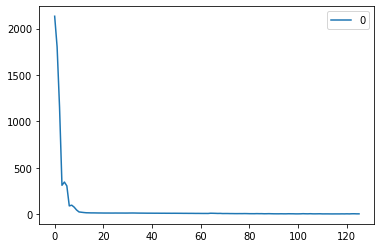

In [71]:
ts = pd.DataFrame(mlr.loss_curve_).plot()

# MLP with Karas Framework

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [83]:
input_dim = X.shape[1]
def mlp_regressor_model():
	# create model
  model = Sequential()
  model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [84]:
# evaluate model
estimators = []
estimators.append(('mlp-regressor', KerasRegressor(build_fn = mlp_regressor_model, epochs=500, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('crosss validation MAE. is:', np.mean(results))

Streaming output truncated to the last 5000 lines.
Epoch 4/500
123/123 [==============================] - 0s 2ms/step - loss: 102.0370
Epoch 5/500
123/123 [==============================] - 0s 2ms/step - loss: 88.8224
Epoch 6/500
123/123 [==============================] - 0s 2ms/step - loss: 70.5943
Epoch 7/500
123/123 [==============================] - 0s 2ms/step - loss: 51.7467
Epoch 8/500
123/123 [==============================] - 0s 2ms/step - loss: 38.3021
Epoch 9/500
123/123 [==============================] - 0s 2ms/step - loss: 23.8648
Epoch 10/500
123/123 [==============================] - 0s 2ms/step - loss: 22.5795
Epoch 11/500
123/123 [==============================] - 0s 2ms/step - loss: 19.4741
Epoch 12/500
123/123 [==============================] - 0s 2ms/step - loss: 19.3549
Epoch 13/500
123/123 [==============================] - 0s 2ms/step - loss: 18.5172
Epoch 14/500
123/123 [==============================] - 0s 2ms/step - loss: 16.4098
Epoch 15/500
123/123 [========